In [2]:
import os
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

In [3]:
pd.__version__
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [69]:
AARM_DEVICES = {
    "jetson_cpu": "Nvidia Jetson CPU Only",
    "jetson_gpu": "Nvidia Jetson GPU Enabled", 
    "rpi4_cpu": "Raspberry Pi 4B"
} # pi3_cpu
x86_DEVICES= ["herron_cpu", "herron_gpu", "laptop_cpu"]

SEQ_LENGTHS = [2 ** seqlen for seqlen in range(10)]

In [92]:
BASELINE_TRANSFORMERS = ["bert", "roberta"]
OTHER_TRANSFORMERS = [
    'longformer', 'deberta', 'albert', 'ibert'
]
EFFICIENT_TRANSFORMERS = [
    "distilbert", "mobile_bert",  
    "squeeze_bert", "funnel_transformer"
]

In [72]:
BASELINE_VISUAL = [
    "resnet", "squeezenet", "vgg16", "vit32", "alexnet", 
    "densenet", "inception", "googlenet", "shufflenet",
    "resnext50_32x4d", "wide_resnet50_2"
]

EFFICIENT_VISUAL = [
    "efficientnet", "efficientnet_lite", "gernet", 
    "squeezenet", "mobilenet_v2", "mnasnet"
]

In [98]:
EXP_DIR = "experiments/0903_transformers/"
DEVICE_LIST = ["laptop_cpu"]

In [99]:
all_results = pd.concat([
    pd.read_csv(os.path.join(EXP_DIR, f"{device}.csv"))
    for device in DEVICE_LIST
])

In [101]:
all_results

,accelerator,avg_memory,batch_size,device,macs,max_memory,mean,model,requires_grad,sequence_length,total_params,trainable_params
0,0,1138.846094,1,laptop_cpu,85524480,1138.863281,0.026762,bert,0,1,109482240,0
1,0,721.152344,1,laptop_cpu,170459136,721.152344,0.043807,bert,0,2,109482240,0
2,0,721.628906,1,laptop_cpu,340328448,721.628906,0.044131,bert,0,4,109482240,0
3,0,721.948437,1,laptop_cpu,680067072,722.007812,0.052969,bert,0,8,109482240,0
4,0,722.549479,1,laptop_cpu,1359544320,722.660156,0.066619,bert,0,16,109482240,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,609.316406,1,laptop_cpu,852590592,609.429688,0.037730,squeeze_bert,0,32,51094272,0
83,0,613.396484,1,laptop_cpu,1704591360,613.511719,0.067586,squeeze_bert,0,64,51094272,0
84,0,618.503472,1,laptop_cpu,3408592896,620.832031,0.141960,squeeze_bert,0,128,51094272,0
85,0,626.525608,1,laptop_cpu,6816595968,634.171875,0.350635,squeeze_bert,0,256,51094272,0


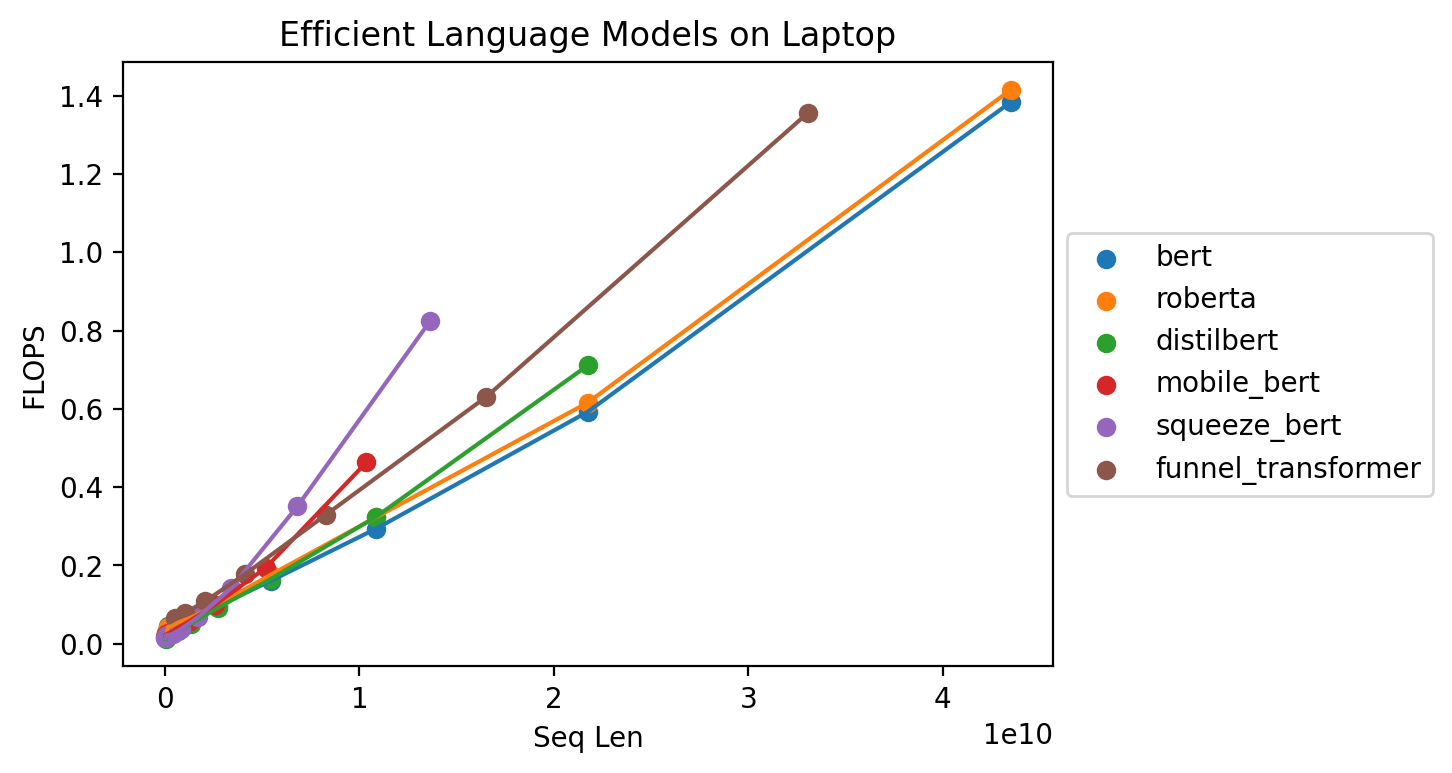

In [112]:
plt.ylabel("FLOPS")
plt.xlabel("Seq Len")


# for device in DEVICE_LIST:
results = all_results.loc[all_results['device'] == "laptop_cpu"]
for model in BASELINE_TRANSFORMERS + EFFICIENT_TRANSFORMERS :
    seq_lens = results.loc[results['model'] == model]['sequence_length'].tolist()
    avg_memory = results.loc[results['model'] == model]['avg_memory'].tolist()
    mac_result = results.loc[results['model'] == model]['macs'].tolist()
    wallclock_result = results.loc[results['model'] == model]['mean'].tolist()
    param_count = results.loc[results['model'] == model]['total_params'].tolist()
    
    x_ax = mac_result
    y_ax = wallclock_result
    plt.scatter(x_ax, y_ax, label=f"{model}")
    plt.plot(x_ax,y_ax)

plt.title("Efficient Language Models on Laptop")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [84]:
all_results

,accelerator,avg_memory,batch_size,device,img_size,macs,max_memory,mean,model,requires_grad,total_params,trainable_params
0,0.0,3096.057292,1.0,cpu,224.0,4.363144e+09,3096.105469,0.247771,vit32,0.0,88224232.0,0.0
1,0.0,3439.528125,1.0,cpu,384.0,1.265614e+10,3440.007812,0.603277,vit32,0.0,88297192.0,0.0
2,0.0,3467.858594,1.0,cpu,448.0,1.719547e+10,3468.097656,0.834690,vit32,0.0,88337128.0,0.0
3,0.0,3779.401042,1.0,cpu,512.0,2.243315e+10,3779.578125,1.138817,vit32,0.0,88383208.0,0.0
4,0.0,2751.500000,1.0,cpu,224.0,5.400159e+09,2751.500000,0.247940,efficientnet,0.0,54139356.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,2931.298651,1.0,cpu,512.0,5.969119e+10,2978.070312,1.830927,wide_resnet50_2,0.0,68883240.0,0.0
60,0.0,2752.789062,1.0,cpu,224.0,3.253292e+08,2753.718750,0.019819,mnasnet,0.0,4383312.0,0.0
61,0.0,2783.708767,1.0,cpu,384.0,9.535877e+08,2786.785156,0.060840,mnasnet,0.0,4383312.0,0.0
62,0.0,2800.941732,1.0,cpu,448.0,1.297477e+09,2814.652344,0.087032,mnasnet,0.0,4383312.0,0.0
